In [17]:
import pandas as pd
import ruptures as rpt
import numpy as np
import os
import joblib
import model.function.visualise as vis
from sklearn.metrics import confusion_matrix

In [18]:
vi = vis.Visualise()

In [19]:
path =  'C://python//train//'
fallPath = 'C://python//train//fall_csv_new_test//'
normalPath = 'C://python//train//normal_csv_new_test//'

In [20]:
model_new = joblib.load(path + 'model_final//model_new_data.sav')

In [21]:
rawFallData = pd.concat([pd.read_csv(fallPath + file) for file in os.listdir(fallPath)])
rawNormalData = pd.concat([pd.read_csv(normalPath + file) for file in os.listdir(normalPath)]) 

In [22]:
data = np.concatenate((rawFallData, rawNormalData), axis=0)

In [23]:
def setLabel(fallPath: str, normalPath: str) -> np.array:
    label = []
    for file in os.listdir(fallPath):
        df = pd.read_csv(fallPath + file)
        diff = df[df.columns[1::2]]
        algo1 = rpt.Pelt(model="rbf").fit(diff.iloc[:,0].to_numpy())
        fluctuation = algo1.predict(pen=10)
        for i in range(len(df)):
            if i < fluctuation[0]:
                label.append(-1)
            else:
                label.append(1)
    for file in os.listdir(normalPath):
        df = pd.read_csv(normalPath + file)
        for i in range(len(df)):
            label.append(-1)
    return np.array(label)

In [24]:
label = setLabel('C://python//train//fall_csv_new_test//', 'C://python//train//normal_csv_new_test//')

In [25]:
y_pred = model_new.predict(data)

In [26]:
vi.report(y_pred, label)

              precision    recall  f1-score   support

          -1       0.96      0.99      0.98      7423
           1       0.96      0.78      0.86      1351

    accuracy                           0.96      8774
   macro avg       0.96      0.89      0.92      8774
weighted avg       0.96      0.96      0.96      8774



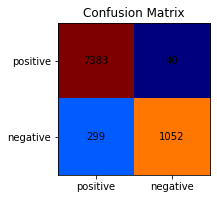

In [27]:
vi.conf_mat(y_pred, label)

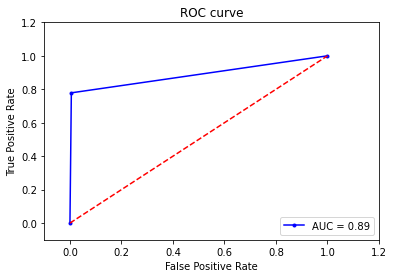

In [28]:
vi.show_roc(y_pred, label)

In [29]:
cm = confusion_matrix(label, y_pred)

In [30]:
cm

array([[7383,  299],
       [  40, 1052]], dtype=int64)

In [31]:
cm[0][0]/(cm[0][0] + cm[0][1])

0.9610778443113772

In [32]:
cm[1][1]/(cm[1][0] + cm[1][1])

0.9633699633699634